In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv("/content/drive/MyDrive/telco.csv")
df.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [3]:
df.shape


(7043, 50)

In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [5]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
State,0


In [6]:
drop_cols = [
    "Customer ID",
    "Customer Status",
    "Churn Category",
    "Churn Reason",
    "Churn Score",
    "Country",
    "State",
    "City",
    "Zip Code",
    "Latitude",
    "Longitude"
]

df.drop(columns=drop_cols, inplace=True)


In [7]:
df["Churn Label"] = df["Churn Label"].map({"Yes": 1, "No": 0})


In [12]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-915033366.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [18]:
df["Offer"].fillna("No Offer", inplace=True)
df["Internet Type"].fillna("No Internet", inplace=True)


/tmp/ipython-input-1655988840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Offer"].fillna("No Offer", inplace=True)
/tmp/ipython-input-1655988840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [19]:
df.isna().sum()

,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Population,0
Quarter,0
Referred a Friend,0


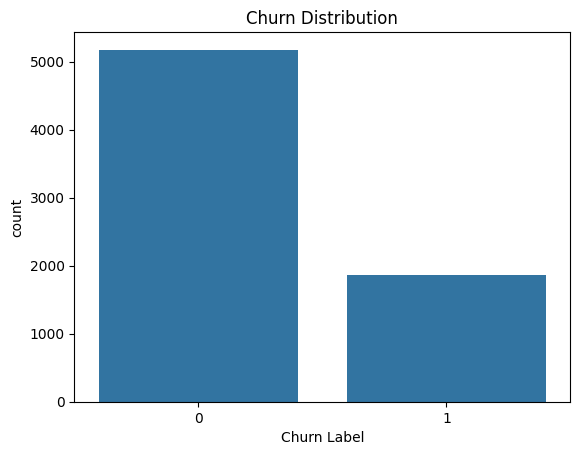

In [20]:
sns.countplot(x="Churn Label", data=df)
plt.title("Churn Distribution")
plt.show()


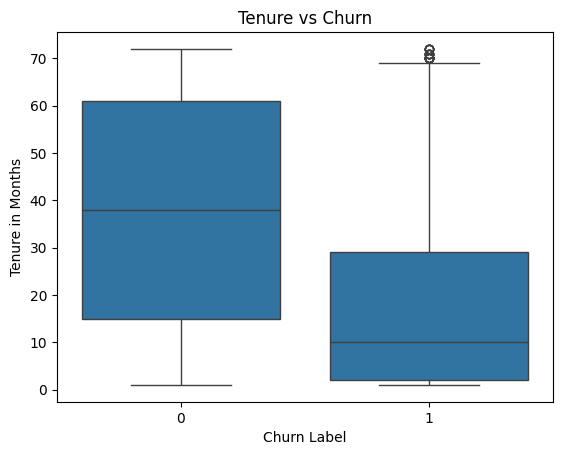

In [21]:
sns.boxplot(x="Churn Label", y="Tenure in Months", data=df)
plt.title("Tenure vs Churn")
plt.show()


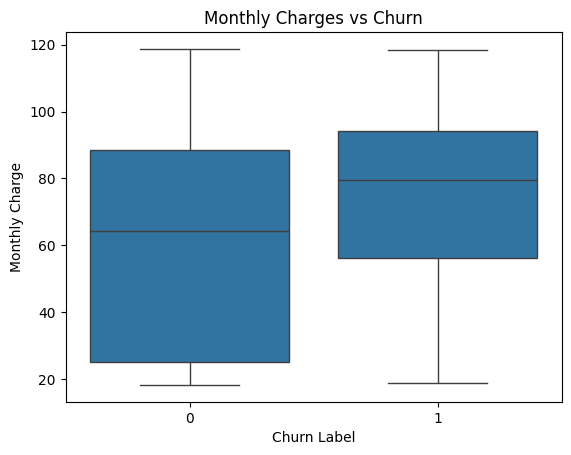

In [22]:
sns.boxplot(x="Churn Label", y="Monthly Charge", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


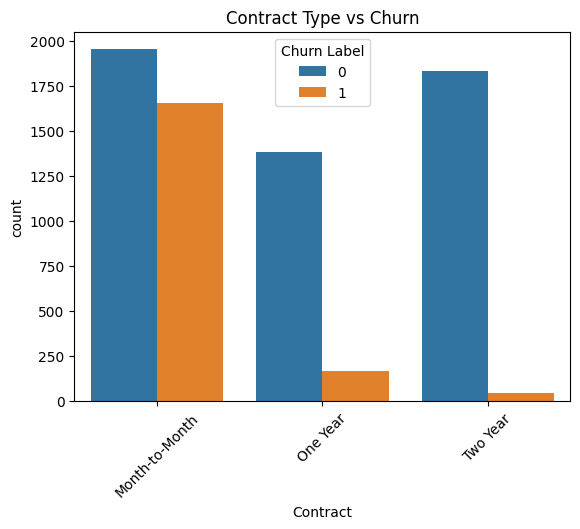

In [23]:
sns.countplot(x="Contract", hue="Churn Label", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()


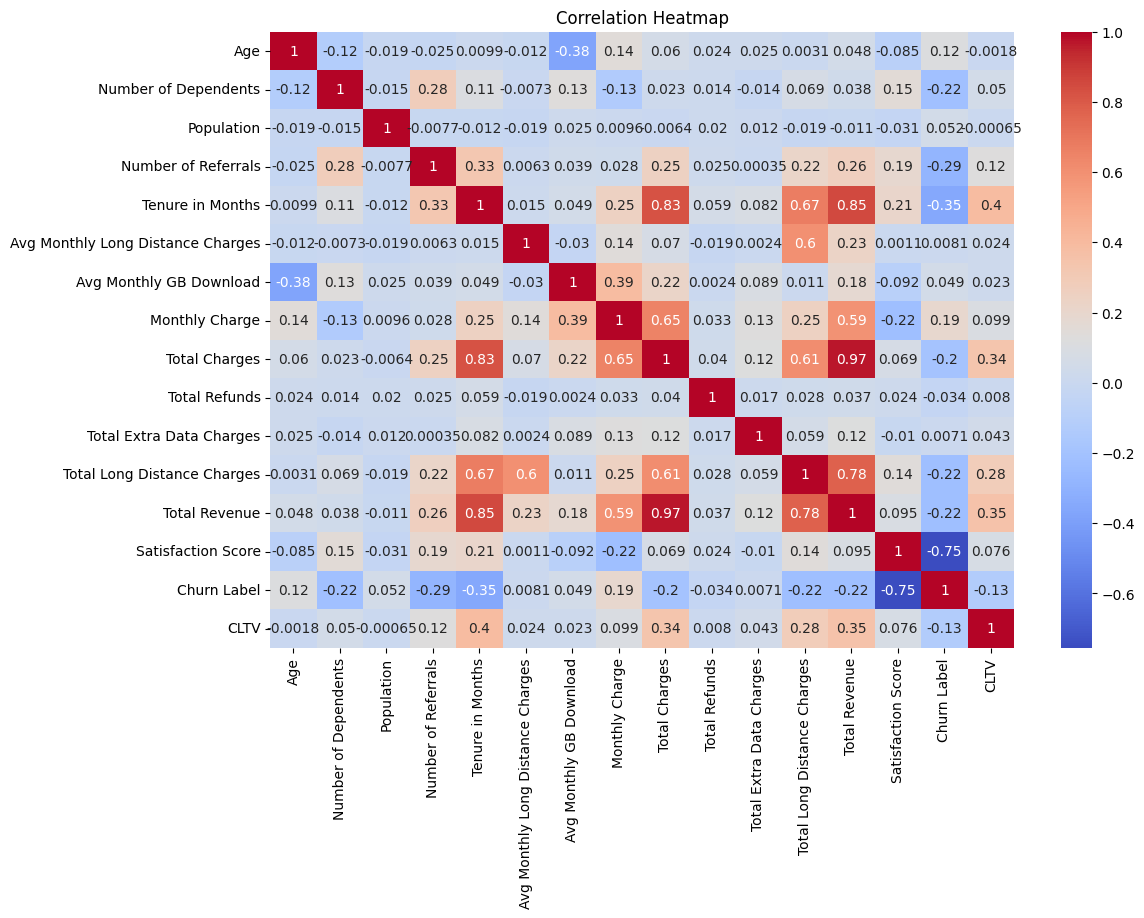

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [25]:
cat_cols = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [26]:
X = df.drop("Churn Label", axis=1)
y = df["Churn Label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [29]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9488999290276792

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1009
           1       0.93      0.89      0.91       400

    accuracy                           0.95      1409
   macro avg       0.94      0.93      0.94      1409
weighted avg       0.95      0.95      0.95      1409



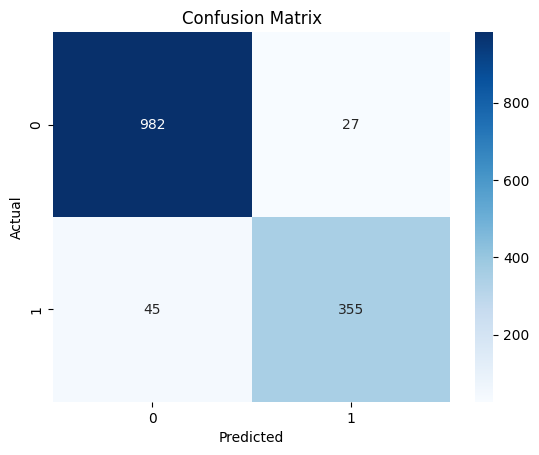

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [31]:
sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)

if prediction[0] == 1:
    print("Customer will CHURN")
else:
    print("Customer will NOT churn")


Customer will CHURN
